In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tables

In [5]:
customers = pd.read_csv('../DataSet/cleaned_dataset/customers_cleaned.csv')
geolocation = pd.read_csv('../DataSet/cleaned_dataset/geolocation_cleaned.csv')
order_items = pd.read_csv('../DataSet/cleaned_dataset/order_items_cleaned.csv')
order_payments = pd.read_csv('../DataSet/cleaned_dataset/payments_cleaned.csv')
order_reviews = pd.read_csv('../DataSet/cleaned_dataset/reviews_cleaned.csv')
orders = pd.read_csv('../DataSet/cleaned_dataset/orders_cleaned.csv')
products = pd.read_csv('../DataSet/cleaned_dataset/products_cleaned.csv')
sellers = pd.read_csv('../DataSet/cleaned_dataset/sellers_cleaned.csv')
product_category = pd.read_csv('../DataSet/cleaned_dataset/product_category_name_cleaned.csv')

# order trends

# Total no of  orders placed

In [ ]:

orders['order_id'].nunique()

99441

In [8]:
orders[['order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date']] = orders[[
            'order_purchase_timestamp',
            'order_approved_at',
            'order_delivered_carrier_date',
            'order_delivered_customer_date',
            'order_estimated_delivery_date'
        ]].apply(pd.to_datetime)

In [9]:
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month']=orders['order_purchase_timestamp'].dt.month_name()
orders['day']= orders['order_purchase_timestamp'].dt.day_name()


# order count by month and year

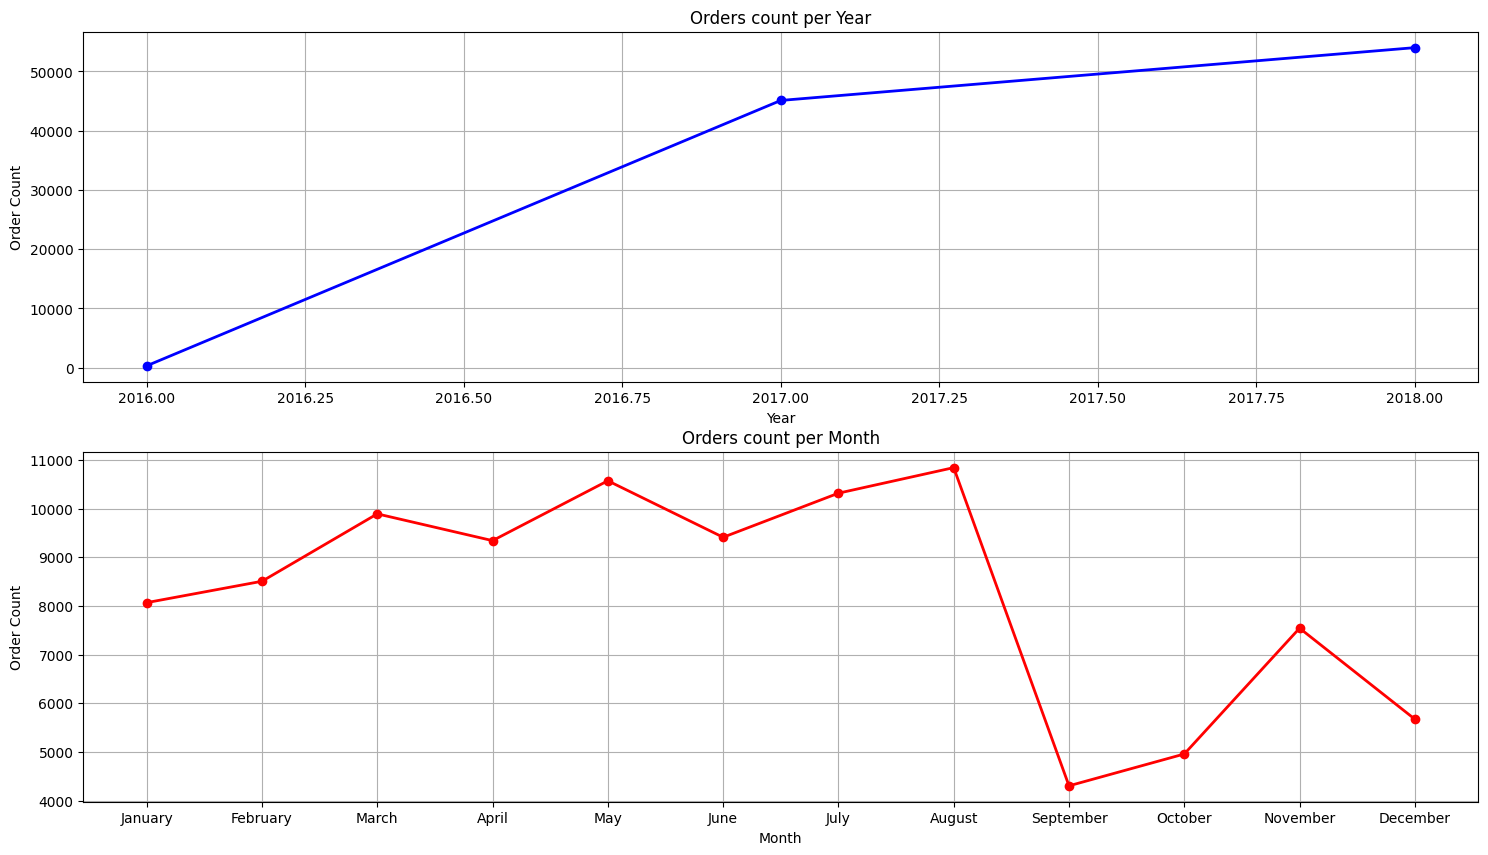

In [38]:
orders_per_year  = orders.groupby('year')['order_id'].count().reset_index()

orders_per_month = orders.groupby('month')['order_id'].count().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

orders_per_month['month'] = pd.Categorical(
    orders_per_month['month'],
    categories=month_order,
    ordered=True
)
orders_per_month = orders_per_month.sort_values('month')


fig, axes = plt.subplots(2,1, figsize=(18,10))
axes[0].plot(orders_per_year['year'], orders_per_year['order_id'], marker='o', color='blue', linewidth=2)
axes[0].set_title('Orders count per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Order Count')
axes[0].grid(True)

axes[1].plot(orders_per_month['month'], orders_per_month['order_id'], marker='o', color='red', linewidth=2)
axes[1].set_title('Orders count per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Order Count')
axes[1].grid(True)


# order count by day and day type

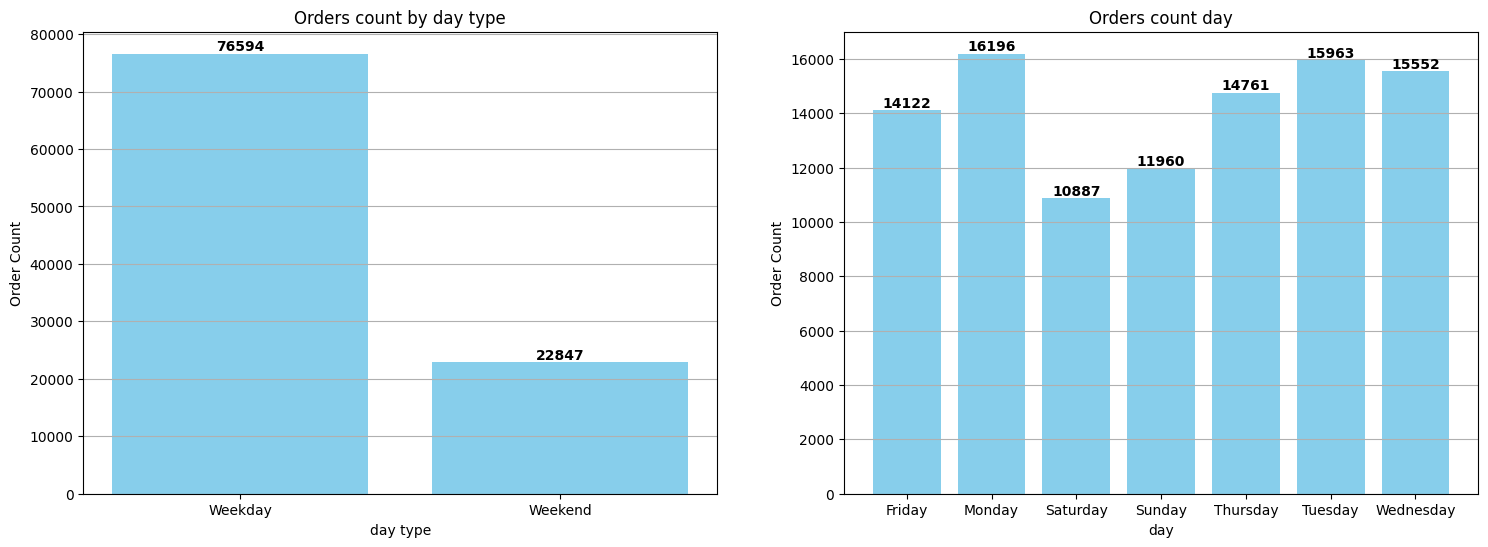

In [37]:
# Define mapping
weekday_map = {
    'Monday'   : 'Weekday',
    'Tuesday'  : 'Weekday',
    'Wednesday': 'Weekday',
    'Thursday' : 'Weekday',
    'Friday'   : 'Weekday',
    'Saturday' : 'Weekend',
    'Sunday'   : 'Weekend'
}

# Apply mapping
orders['day_type'] = orders['day'].map(weekday_map)
orders_per_day_type   = orders.groupby('day_type')['order_id'].count().reset_index()
orders_per_day   = orders.groupby('day')['order_id'].count().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(18,6))
bars =axes[0].bar(orders_per_day_type['day_type'], orders_per_day_type['order_id'],color='skyblue')
for bar in bars:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height,                             # Y position
        f'{int(height)}',                   # Label text
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

axes[0].set_title('Orders count by day type')
axes[0].set_xlabel('day type')
axes[0].set_ylabel('Order Count')
axes[0].grid(axis='y')

bars =axes[1].bar(orders_per_day['day'], orders_per_day['order_id'],color='skyblue')
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height,                             # Y position
        f'{int(height)}',                   # Label text
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )
axes[1].set_title('Orders count day')
axes[1].set_xlabel('day')
axes[1].set_ylabel('Order Count')
axes[1].grid(axis='y')


# Top 5 cities and states by order count

In [13]:
mdf= pd.merge(left=customers,right=orders,on='customer_id')

In [35]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

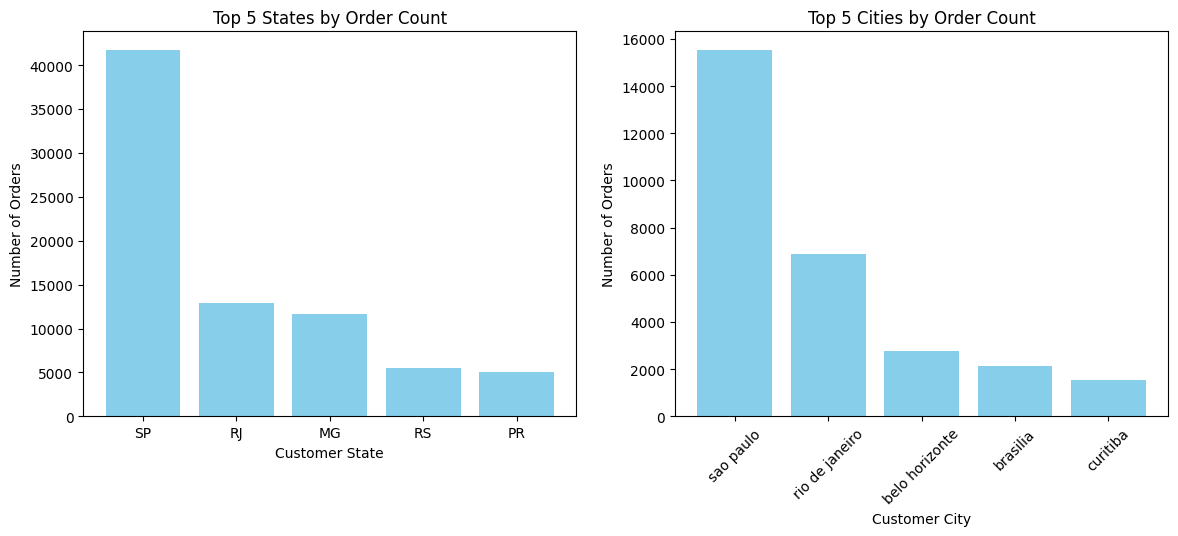

In [36]:
top5_states=mdf.groupby('customer_state')['order_id'].count().sort_values(ascending=False).iloc[:5]
top10_cities = mdf.groupby('customer_city')['order_id'].count().sort_values(ascending=False).iloc[:5]
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(top5_states.index, top5_states.values, color='skyblue')
axes[0].set_title('Top 5 States by Order Count')
axes[0].set_xlabel('Customer State')
axes[0].set_ylabel('Number of Orders')

axes[1].bar(top10_cities.index, top10_cities.values, color='skyblue')
axes[1].set_title('Top 5 Cities by Order Count')
axes[1].set_xlabel('Customer City')
axes[1].set_ylabel('Number of Orders')
axes[1].tick_params(axis='x', rotation=45)


# One time buyers Vs Repeated customers

In [10]:
mdf.groupby('customer_unique_id')['order_id'].count().sort_values(ascending=False)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
5657dfebff5868c4dc7e8355fea865c4     1
5657596addb4d7b07b32cd330614bdf8     1
5656eb169546146caeab56c3ffc3d268     1
5656a8fabc8629ff96b2bc14f8c09a27     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Name: order_id, Length: 96096, dtype: int64

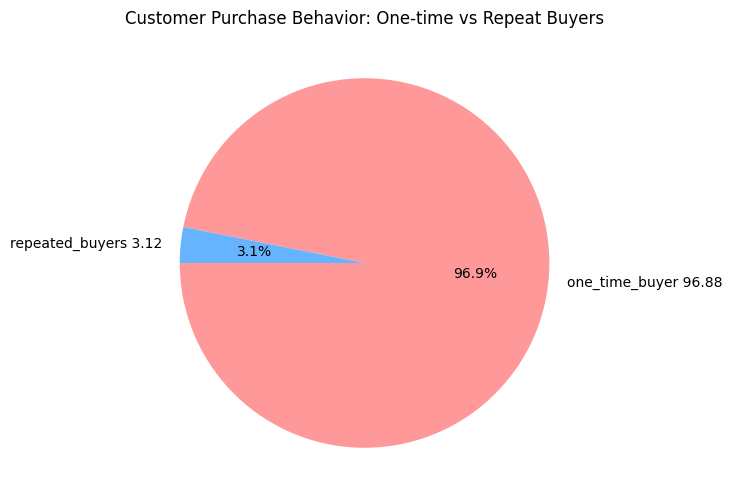

In [26]:
customers_orders= mdf.groupby('customer_unique_id')['order_id'].count()

one_time_buyer= (customers_orders==1).sum()
repeated_buyers = (customers_orders>1).sum()
total_cust= one_time_buyer+repeated_buyers

one_time_pct= round((one_time_buyer/total_cust)*100, 2)
repeated_pct= round((repeated_buyers/total_cust)*100, 2)

labels =[f'one_time_buyer {one_time_pct}', f'repeated_buyers {repeated_pct}']
sizes= [one_time_buyer, repeated_buyers]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
    startangle=180,colors = ['#ff9999','#66b3ff'])
plt.title('Customer Purchase Behavior: One-time vs Repeat Buyers')
plt.show()

In [41]:
pmdf=products.merge(product_category, on='product_category_name', how = 'inner')

# Total no unique Categories

In [42]:
pmdf['product_category_name'].nunique()

71

# Total no of products

In [43]:
pmdf['product_category_name_english'].count()

np.int64(32328)

# Unique Categories and thier product count

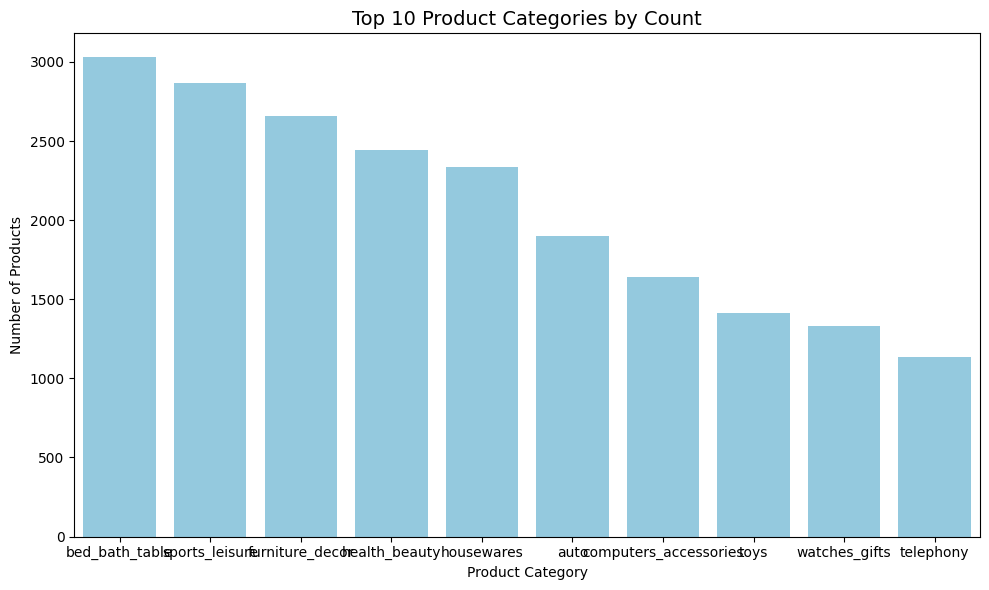

In [47]:

category_count=pmdf.groupby('product_category_name_english')['product_id'].count().sort_values(ascending=False).reset_index().rename(columns={'product_id':'count'})
top10_category=category_count.head(10).copy()
top10_category

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_category,
    x='product_category_name_english',
    y='count', color='skyblue'
)

plt.title('Top 10 Product Categories by Count', fontsize=14)
plt.ylabel('Number of Products')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()